Extracting Dataset using kaggle library

In [1]:
# installing the kaggle library
!pip install kaggle

In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json manually

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soumyajitbhandary","key":"c3f101245be8f4c3934dbe1c93dbe333"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Secure the API key

In [4]:
!kaggle datasets list

ref                                                                  title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                    Chocolate Sales Data 📊🍫                                  14473  2025-03-19 03:51:40.270000          11534        203  1.0              
adilshamim8/student-depression-dataset                               Student Depression Dataset                              467020  2025-03-13 03:12:30.423000           3896         63  1.0              
abdulmalik1518/mobiles-dataset-2025                                  Mobiles Dataset (2025)                                   20314  2025-02-18 06:50:24.370000          17300      

Importing the dog vs cat dataset from kaggle

In [5]:
# Kaggle api
! kaggle competitions download -c dogs-vs-cats

In [6]:
!ls

dogs-vs-cats.zip  sample_data


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset has been extracted.')


The dataset has been extracted.


In [8]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset has been extracted.')


The dataset has been extracted.


In [9]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('NUmber of images:', file_count)

NUmber of images: 25000


Printing the name of images

In [10]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.6020.jpg', 'dog.10782.jpg', 'cat.7539.jpg', 'dog.9013.jpg', 'dog.5439.jpg', 'dog.1058.jpg', 'dog.4068.jpg', 'dog.12498.jpg', 'dog.1385.jpg', 'dog.2874.jpg', 'dog.11733.jpg', 'dog.8157.jpg', 'cat.4612.jpg', 'cat.10396.jpg', 'dog.1320.jpg', 'cat.1755.jpg', 'cat.8098.jpg', 'dog.18.jpg', 'cat.7462.jpg', 'cat.7034.jpg', 'cat.1571.jpg', 'dog.2995.jpg', 'dog.4076.jpg', 'cat.10488.jpg', 'dog.3489.jpg', 'dog.446.jpg', 'cat.9450.jpg', 'cat.10198.jpg', 'dog.11468.jpg', 'cat.5605.jpg', 'dog.2154.jpg', 'dog.1461.jpg', 'dog.3781.jpg', 'dog.132.jpg', 'dog.4414.jpg', 'dog.9208.jpg', 'cat.1698.jpg', 'dog.5333.jpg', 'cat.4067.jpg', 'cat.9213.jpg', 'dog.11729.jpg', 'cat.647.jpg', 'cat.8310.jpg', 'cat.8034.jpg', 'cat.10999.jpg', 'dog.2033.jpg', 'dog.4165.jpg', 'cat.8570.jpg', 'cat.9981.jpg', 'cat.3284.jpg', 'dog.6098.jpg', 'dog.11017.jpg', 'cat.1286.jpg', 'dog.7415.jpg', 'dog.10794.jpg', 'cat.9672.jpg', 'dog.7878.jpg', 'cat.5210.jpg', 'cat.1090.jpg', 'dog.4198.jpg', 'dog.5897.jpg', 'dog.459.jpg', 'd

Importing the dependencies

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


Displaying the images of dogs and cats

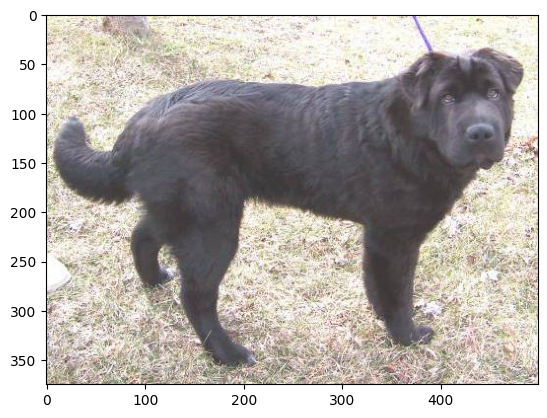

In [12]:
# display dog image
img = mpimg.imread('/content/train/dog.11021.jpg')
imgplot = plt.imshow(img)
plt.show()


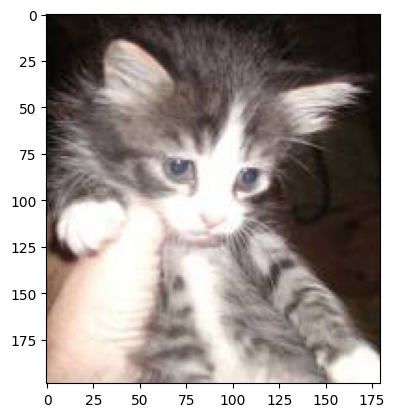

In [13]:
# display cat image
img = mpimg.imread('/content/train/cat.7723.jpg')
imgplot = plt.imshow(img)
plt.show()


In [14]:
file_names = os.listdir('/content/train')

for i in range(5):
  name=file_names[i]
  print(name[0:3])


dog
dog
cat
dog
dog


In [15]:
file_names = os.listdir('/content/train')
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count +=1
  else:
    cat_count +=1
print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)


Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [16]:
# creating a directory for resized images
os.mkdir('/content/image resized')

In [17]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open( img_path )
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)


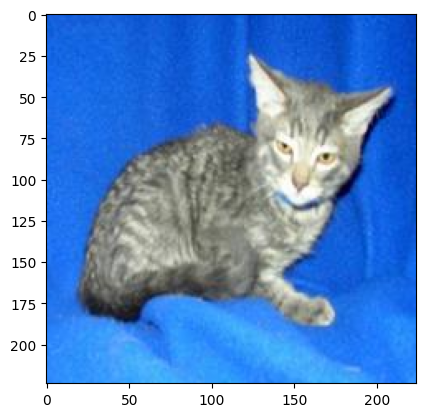

In [18]:
# display resized dog image
img = mpimg.imread('/content/image resized/cat.10034.jpg')
imgplot = plt.imshow(img)
plt.show()


creating labels for resized imiages for dogs and cats

cat--> 0

DOg --> 1

In [19]:
# creating a for loop for assign labels

file_names = os.listdir('/content/image resized/')

labels = []

for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)


In [20]:
print(file_names[0:5])
print(len(file_names))

['dog.6020.jpg', 'dog.10782.jpg', 'cat.7539.jpg', 'dog.9013.jpg', 'dog.5439.jpg']
2000


In [21]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 1, 1]
2000


In [22]:
# counting the images of cat and dogs out of 2000 images

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1029  971]


converting all the resized images to numpy arrays

In [23]:
import cv2
import glob

In [24]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory +'*.' + e))for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [25]:
print(dog_cat_images)

[[[[ 65  98  77]
   [ 65  98  77]
   [ 75 103  84]
   ...
   [ 38  90 102]
   [ 31  78  92]
   [ 37  83 100]]

  [[ 75 108  87]
   [ 71 102  81]
   [ 70  98  79]
   ...
   [ 51 103 115]
   [ 51  97 114]
   [ 42  88 105]]

  [[ 68  99  78]
   [ 69 100  79]
   [ 71  99  80]
   ...
   [ 59 111 124]
   [ 65 111 129]
   [ 42  88 106]]

  ...

  [[ 10  71  67]
   [ 55 115 114]
   [ 79 137 136]
   ...
   [ 82 135 156]
   [ 32  82 102]
   [  3  53  73]]

  [[ 67 132 133]
   [ 46 110 111]
   [ 17  78  82]
   ...
   [ 63 116 137]
   [ 43  93 113]
   [ 27  77  97]]

  [[ 43 110 113]
   [ 23  90  93]
   [ 47 109 117]
   ...
   [129 182 203]
   [127 176 198]
   [ 94 144 164]]]


 [[[ 96 114 143]
   [150 169 196]
   [176 190 218]
   ...
   [ 56  65  55]
   [ 60  64  52]
   [ 73  76  61]]

  [[107 125 154]
   [134 153 180]
   [154 171 198]
   ...
   [ 76  81  72]
   [ 70  72  60]
   [ 75  75  61]]

  [[107 125 154]
   [126 145 172]
   [143 160 187]
   ...
   [118 117 107]
   [105 102  88]
   [103  98

In [26]:
type(dog_cat_images)

numpy.ndarray

In [27]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [28]:
x = dog_cat_images
y = np.asarray(labels)

Train Train split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [30]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [31]:
# scaling the data
x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [32]:
print(x_train_scaled)

[[[[1.         0.86666667 0.69411765]
   [1.         0.86666667 0.69411765]
   [1.         0.86666667 0.69411765]
   ...
   [1.         0.87843137 0.68627451]
   [1.         0.87843137 0.68235294]
   [1.         0.87843137 0.68235294]]

  [[1.         0.86666667 0.69411765]
   [1.         0.86666667 0.69411765]
   [1.         0.86666667 0.69411765]
   ...
   [1.         0.8745098  0.69411765]
   [1.         0.87843137 0.68627451]
   [1.         0.87843137 0.68627451]]

  [[1.         0.86666667 0.69411765]
   [1.         0.86666667 0.69411765]
   [1.         0.86666667 0.69411765]
   ...
   [1.         0.87843137 0.70196078]
   [1.         0.87843137 0.70196078]
   [1.         0.87843137 0.70196078]]

  ...

  [[0.25882353 0.52941176 0.44705882]
   [0.1372549  0.40784314 0.3254902 ]
   [0.17254902 0.44705882 0.35686275]
   ...
   [0.23529412 0.52156863 0.43529412]
   [0.2745098  0.55686275 0.47843137]
   [0.18039216 0.4745098  0.38823529]]

  [[0.10980392 0.39215686 0.30196078]
   [0. 

Building a neural network

In [33]:
import tensorflow_hub as hub

mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow1/035-160-classification/1?tfhub-redirect=true'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [34]:
import tensorflow as tf
import tensorflow_hub as hub

class HubLayerWrapper(tf.keras.layers.Layer):
    def __init__(self, hub_url, trainable=False):
        super().__init__()
        self.hub_layer = hub.KerasLayer(hub_url, trainable=trainable)

    def call(self, inputs):
        return self.hub_layer(inputs)

# Number of output classes
num_of_classes = 2

# Wrap the pretrained model
pretrained_model = HubLayerWrapper(
    "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5",
    trainable=False
)

# Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),  # Define input shape
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hub_layer_wrapper (HubLayerWrapper)  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,098 (16.01 KB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [36]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - acc: 0.7593 - loss: 0.5588
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - acc: 0.9784 - loss: 0.0646
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - acc: 0.9858 - loss: 0.0497
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 260s 5s/step - acc: 0.9957 - loss: 0.0270
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - acc: 0.9948 - loss: 0.0244


In [37]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - acc: 0.9811 - loss: 0.0505
Test Loss = 0.05341683700680733
Test Accuracy = 0.9800000190734863


Predictive system

Path of the image to be predicted: /content/Golden-Retriever.webp


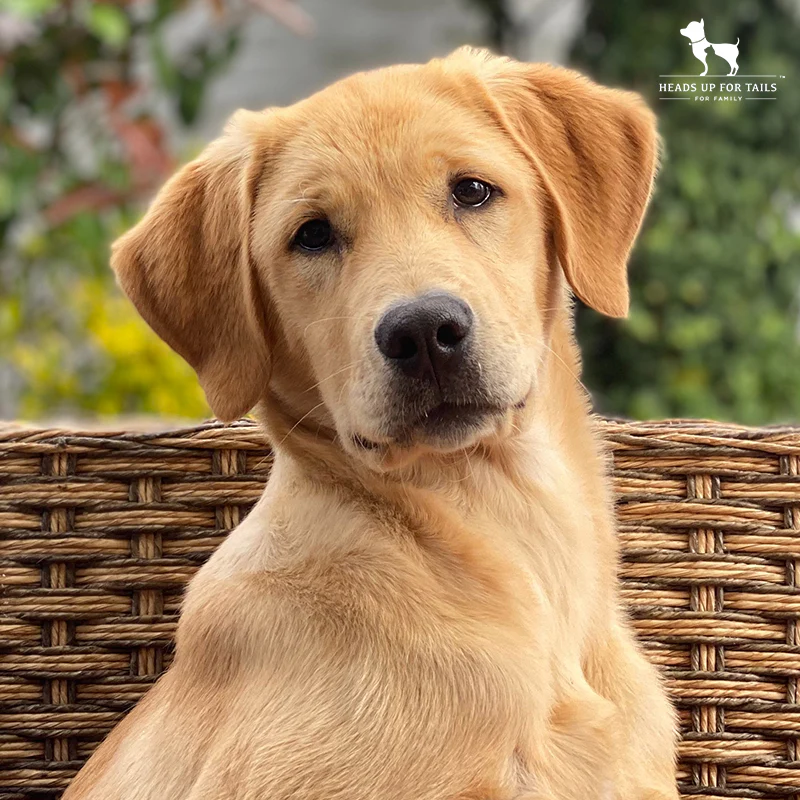

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
[[2.8402375e-05 9.9997163e-01]]
1
The image represents a Dog


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')